In [1]:
#importing packages 
import IPython.display as display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import collections
import emot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
#reading in twitter dataset
tweets_df = pd.read_csv('FinalDataset23102022.csv')

In [11]:
tweets_df

,Unnamed: 0,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,SearchTerm
0,0,9.277850e+07,2022-09-27 12:35:04+00:00,,1.574740e+18,en,0,0,0,3,Twitter for iPhone,RT @theAstroAgency: We couldn’t be more proud ...,AwarenessSpaceSustainability
1,1,1.498580e+18,2022-09-27 09:00:58+00:00,,1.574690e+18,en,1,0,0,0,Hootsuite Inc.,📅 Exciting meeting coming up soon! The World S...,AwarenessSpaceSustainability
2,2,1.295120e+18,2022-09-26 21:01:32+00:00,,1.574500e+18,en,0,0,0,3,Twitter for iPhone,RT @theAstroAgency: We couldn’t be more proud ...,AwarenessSpaceSustainability
3,3,3.006811e+09,2022-09-26 12:41:04+00:00,,1.574380e+18,en,0,0,0,3,Twitter Web App,RT @theAstroAgency: We couldn’t be more proud ...,AwarenessSpaceSustainability
4,4,1.150120e+18,2022-09-26 12:08:52+00:00,,1.574370e+18,en,14,0,2,3,Twitter Web App,We couldn’t be more proud to be part of the 2n...,AwarenessSpaceSustainability
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24680,1362,1.331470e+18,2022-09-02 11:15:42+00:00,,1.565660e+18,en,0,0,0,0,Twitter,"Space tourism! ticket price SpaceX $54,634,407...",VirginGalatic
24681,1363,1.331470e+18,2022-09-02 11:15:03+00:00,,1.565660e+18,en,0,0,0,0,Twitter,"Space tourism! ticket price SpaceX $54,634,407...",VirginGalatic
24682,1364,1.331470e+18,2022-09-02 11:14:27+00:00,,1.565660e+18,en,0,0,0,0,Twitter,"Space tourism! ticket price SpaceX $54,634,407...",VirginGalatic
24683,1365,1.440000e+18,2022-09-01 17:49:23+00:00,,1.565400e+18,en,1,0,0,0,Reddit Official,"I just posted ""Virgin Galactic Future Astronau...",VirginGalatic


In [12]:
summary = tweets_df[['tweet', 'like_count', 'retweet_count', 'quote_count', 'reply_count']].describe()

summary = summary.round(2)

summary = summary.loc[['count','mean', 'std', 'min', 'max']]

In [13]:
print(summary)

       like_count  retweet_count  quote_count  reply_count
count    24685.00       24685.00     24685.00     24685.00
mean         1.62          18.30         0.05         0.15
std         22.15         118.83         0.67         2.56
min          0.00           0.00         0.00         0.00
max       1931.00       11209.00        59.00       257.00


In [14]:

display.display(summary)


,like_count,retweet_count,quote_count,reply_count
count,24685.00,24685.00,24685.00,24685.00
mean,1.62,18.30,0.05,0.15
std,22.15,118.83,0.67,2.56
min,0.00,0.00,0.00,0.00
max,1931.00,11209.00,59.00,257.00


In [15]:
# Basic Statistics
most_liked = tweets_df[tweets_df['like_count'] == tweets_df['like_count'].max()]


number_of_users = tweets_df['author id'].nunique()
total_tweets = tweets_df.shape[0]
avg_retweets = tweets_df['retweet_count'].mean()
avg_favorites = tweets_df['like_count'].mean()


print("\nMost Liked Tweet:")
print(most_liked['tweet'].values[0])
print(f"Number of likes: {most_liked['like_count'].values[0]}")


print(f'Total number of unique authors: {number_of_users}')
print(f'Total number of tweets: {total_tweets}')
print(f'Average number of retweets: {avg_retweets}')
print(f'Average number of favorites: {avg_favorites}')


Most Liked Tweet:
🧑🏿‍🚀👩‍🚀 We continue to push the boundaries of where customers can process their space data—including the @Space_Station. @JeffBarr explains how @Axiom_Space &amp; #AWS pave the way for future space missions in this latest blog. #SpaceIndustry #SpaceTech
🔗 https://t.co/qTzUagpjTX https://t.co/YEGGbCsq4o
Number of likes: 1931
Total number of unique authors: 10203
Total number of tweets: 24685
Average number of retweets: 18.29718452501519
Average number of favorites: 1.6219566538383634


In [20]:
# Tweets per search term
tweets_per_search_term = tweets_df['SearchTerm'].value_counts()
print('Number of tweets per search term:')
display.display(tweets_per_search_term)

Number of tweets per search term:


SearchTerm
spaceindustry                   6373
SpaceSustainability             6343
SpaceTourism                    3975
NewSpaceEconomy                 3682
SpaceAdventures                 1424
VirginGalatic                   1367
spacetraveller                   626
SpacePerspective                 508
AwarenessSpaceSustainability     385
spaceclubs                         2
Name: count, dtype: int64

In [17]:
#Average retweets and favourites per search term

avg_retweets_per_search_term = tweets_df.groupby('SearchTerm')['retweet_count'].mean()
avg_favorites_per_search_term = tweets_df.groupby('SearchTerm')['like_count'].mean()

print('Average retweets per search term:')
print(avg_retweets_per_search_term)
print('Average favorites per search term:')
print(avg_favorites_per_search_term)


Average retweets per search term:
SearchTerm
AwarenessSpaceSustainability    38.607792
NewSpaceEconomy                  1.445139
SpaceAdventures                 16.316011
SpacePerspective                31.387795
SpaceSustainability             24.532556
SpaceTourism                    43.006541
VirginGalatic                    0.236284
spaceclubs                       0.000000
spaceindustry                    2.404990
spacetraveller                  80.017572
Name: retweet_count, dtype: float64
Average favorites per search term:
SearchTerm
AwarenessSpaceSustainability    2.010390
NewSpaceEconomy                 0.278110
SpaceAdventures                 4.023174
SpacePerspective                3.332677
SpaceSustainability             2.358190
SpaceTourism                    1.396981
VirginGalatic                   0.218727
spaceclubs                      1.500000
spaceindustry                   1.425075
spacetraveller                  1.474441
Name: like_count, dtype: float64


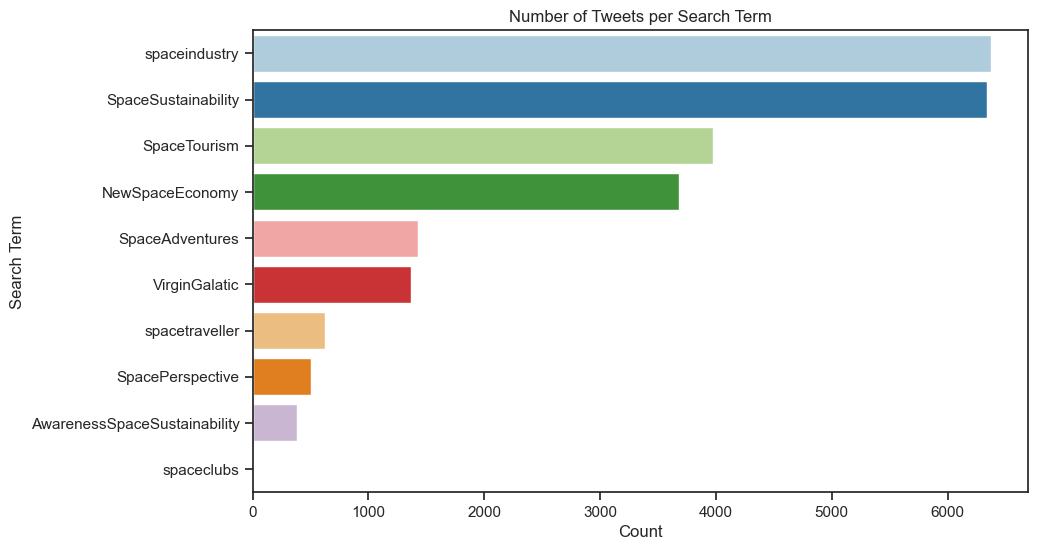

In [18]:
#Setting Seaborn aesthetics
sns.set_context("poster")
sns.set_theme()
sns.set_style("ticks")
palette = sns.color_palette("Paired")

#Plot of the number of tweets per search term
plt.figure(figsize=(10,6))
sns.countplot(y="SearchTerm", data=tweets_df, order = tweets_df['SearchTerm'].value_counts().index, palette=palette)
plt.title('Number of Tweets per Search Term')
plt.xlabel('Count')
plt.ylabel('Search Term')
plt.show()



/var/folders/gs/yd9pl3hx6zv82xw89hyvfw0r0000gn/T/ipykernel_60600/2978348708.py:6: UserWarning:

The palette list has more values (12) than needed (10), which may not be intended.



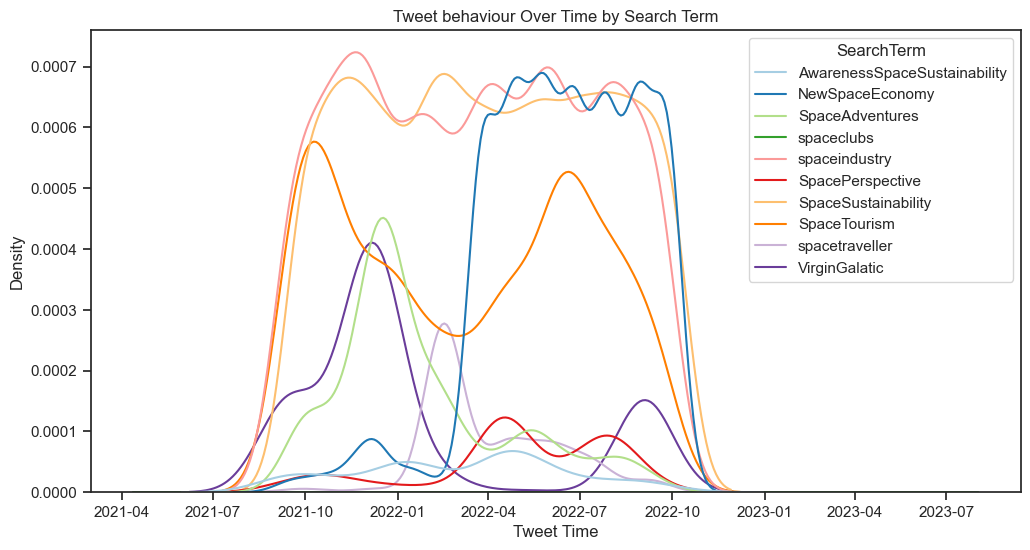

In [19]:
#Exploring density across time for each search term
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

#Plotting distplot
plt.figure(figsize=(12, 6))
sns.kdeplot(tweets_df, x='created_at', hue='SearchTerm', palette=palette)
plt.title("Tweet behaviour Over Time by Search Term")
plt.xlabel("Tweet Time")
plt.ylabel("Density")
plt.show()



In [22]:
#Extracting emoticons

emot_obj = emot.core.emot() 
# Define a function to extract emoticons
def extract_emoticons(text):
  res = emot_obj.emoji(text)
  return res['value']

In [23]:
# Apply the function to each row of the 'tweet' column
tweets_df['emoticons'] = tweets_df['tweet'].apply(extract_emoticons)
# Count the emojis in each list
tweets_df['emoticons'].apply(lambda x: collections.Counter(x))
# Combine the counts
combined_counts = sum(tweets_df['emoticons'].apply(lambda x: collections.Counter(x)), collections.Counter())
# Transform it into a dictionary
emoji_dict = dict(combined_counts)
# Sort it in a descending order
sorted_emoji_dict = dict(sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True))
# Keep the top 10
d = {k: v for i, (k, v) in enumerate(sorted_emoji_dict.items()) if i < 10}
# Convert the dict to a DataFrame for Plotly
emoji_df = pd.DataFrame(list(d.items()), columns=['Emojis', 'Count'])

In [26]:
#Creating plot
emoji_counts = emoji_df.groupby('Emojis').sum()['Count'].sort_values(ascending=False)

# Create a bar chart
data = [go.Bar(
    x=emoji_counts.index,
    y=emoji_counts.values,
    marker=dict(line=dict(color='black'))
)]

layout = go.Layout(
    title='The 10 Most commonly tweeted emojis',
    xaxis=dict(title='Emojis'),
    yaxis=dict(title='Count')
)

fig = go.Figure(data=data, layout=layout)

# Plot the figure using iplot
iplot(fig)
